# **Idea: Wine Quality Prediction**
> *Project 2 Level 2*

Dataset link - https://raw.githubusercontent.com/s-yogeshwaran/OIBSIP/main/WineQT.csv

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#to avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/s-yogeshwaran/OIBSIP/main/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
print(f"No. of rows : {df.shape[0]}")
print(f"No. of columns : {df.shape[1]}")

No. of rows : 1143
No. of columns : 13


In [ ]:
df.drop('Id', axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.duplicated().any()

True

In [ ]:
df.duplicated().sum()

125

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df['quality'].value_counts()

5    433
6    409
7    122
4     33
8     15
3      6
Name: quality, dtype: int64

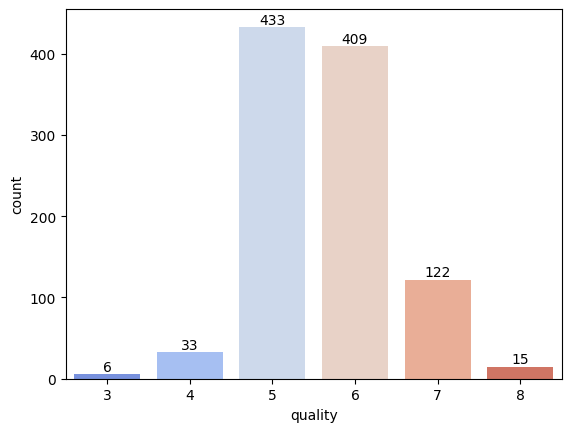

In [ ]:
#distribution of quality column
splot = sns.countplot(x = 'quality', data = df, palette = 'coolwarm')

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')

plt.show()

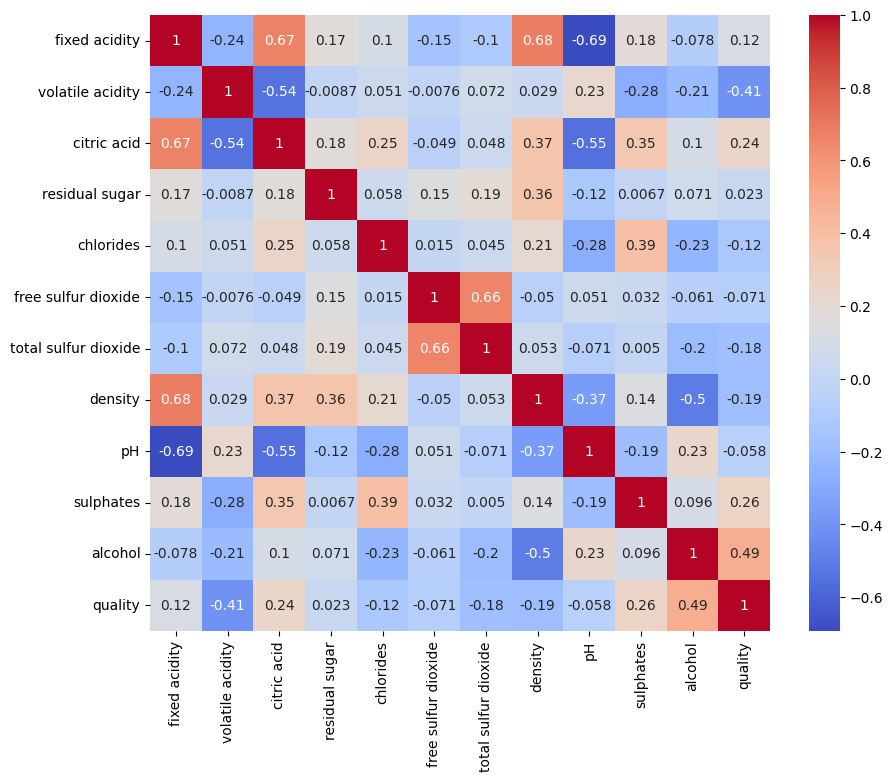

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), cmap= "coolwarm", annot = True)
plt.show()

In [ ]:
x = df.drop('quality',axis=1)
y = y = df['quality'].apply(lambda y_values :1 if y_values>=5 else 0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [ ]:
# print(y.value_counts())

In [ ]:
# y = df['quality'].apply(lambda y_values :1 if y_values>=7 else 0)
# print(y.value_counts())

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred1 = lr.predict(x_test)

In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred1)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.09849899882538758
Mean Squared Error: 0.06269936857660359
Root Mean Squared Error: 0.25039841967672954
R-squared: 0.01906130726167876


In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred2 = rf.predict(x_test)
print(f"accuracy score : {accuracy_score(y_test, y_pred2)}")

accuracy score : 0.9313725490196079


In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.93      1.00      0.96       190

    accuracy                           0.93       204
   macro avg       0.47      0.50      0.48       204
weighted avg       0.87      0.93      0.90       204



In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(x_train, y_train)
y_pred3 = log_reg.predict(x_test)
print(f"accuracy score: {accuracy_score(y_test, y_pred3)}")

accuracy score: 0.9313725490196079




---

